# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

**Цель сследования:**

    1. Определить адекватную стоимость объектов недвижимости;
    2. Создать автоматизированный инструмент анализа и расчёта;
    3. Определить факторы, оказывающие наибольшее влияние на цену;
    4. Определить наиболее выгодные предложения.
    
**Ход исследования:**

Данные я получу из датасета '/datasets/real_estate_data.csv', о данных мне ничего неизвестно, поэтому первым делом я оценю их с точки зрения чистоты и полноты. Если понадобится, то проведу подготовительные мероприятия.

Далее нужно будет оценить влияние полноты данных на цели исследования. Если возможно, и это не исказит финального результата исследования, то постараюсь имеющиеся ошибки. Далее дополню датасет новыми столбцами, с дополнительно помситанными результатами, по мере необходимости.

После всех предварительных шагов перейду к исследовательскому анализу.  
Так можно выделить основные шаги моего исследования:

    * Обзор данных;
    * Предобработка;
    * Расчёты и добавление результатов в таблицу;
    * Проведение анализа для Ленинградской области;
    * Проведение анализа для Санкт-Петербурга;
    * Оценка и сравнение между собой степеней влияния факторов ценообразования;
    * Общий вывод по исследованию.

In [1]:
# импортирем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
# сохраняем дата-сет в переменную
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# проверяем типы данных и кол-во ненулевых значений
data.info()
# визуально оценим содержимое
display(data.head(10)) # display гораздо лучше подходит для визуализации содержимого df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Чтобы понять, в каких столбцах нужно сменить тип данных, нужно соотнести вывод команды `info()` с описанием столбцов, указанному в введении к проекту.

Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении


#### Вывод о содержимом столбцов:

    first_day_exposition тип object - правильный тип datetime;
    ceiling_height - неполные данные;
    floors_total тип float64 - правильный тип int, также неполные данные;
    living_area - неполные данные;
    kitchen_area - неполные данные;
    is_apartment тип object - правильный тип bool, неполные данные;
    balcony тип float64 - правильный тип int, неполные данные;
    airports_nearest - неполные данные;
    cityCenters_nearest - неполные данные;
    parks_around3000 тип float64 - правильный тип int, неполные данные;
    parks_nearest - неполные данные;
    ponds_around3000 тип float64 - правильный тип int, неполные данные;
    ponds_nearest - неполные данные;
    days_exposition тип float64 - правильный тип int, неполные данные.

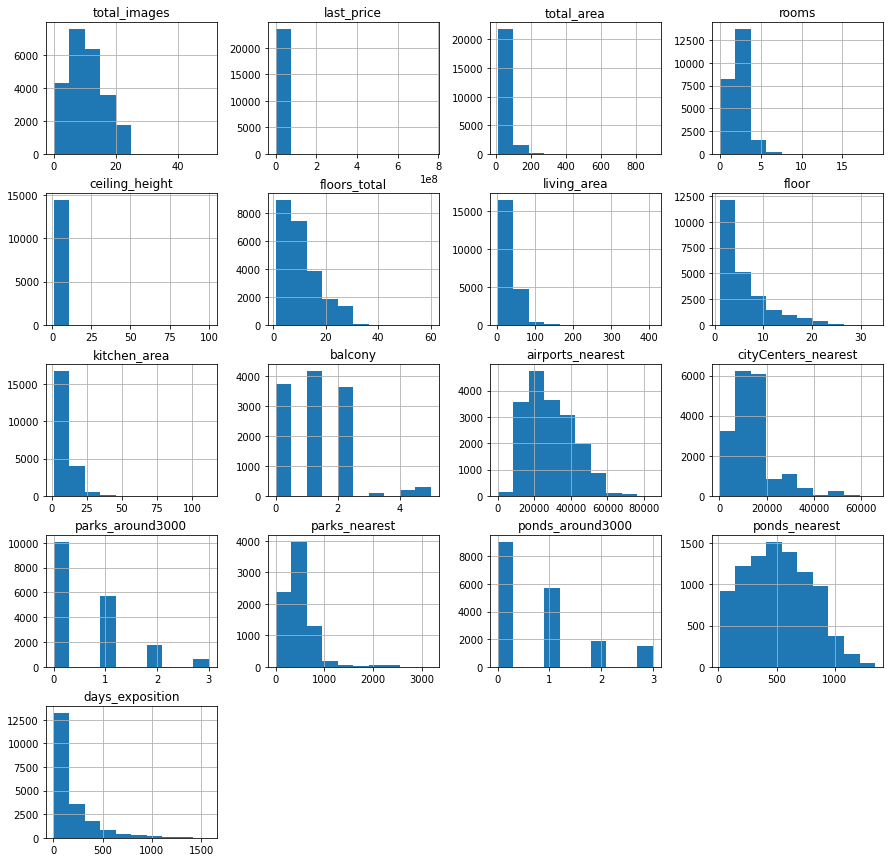

In [2]:
# в качестве визуализации добавим гистограммы всех столбцов датасета
data.hist(grid=True, figsize=(15,15));

### Предобработка данных

In [3]:
# полезно визуализировать количество пропусков по столбцам с тепловой картой
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Преобразуем дату

Если внимательно посмотреть, то видно, что время везде нулевое.
Преобразуем содержимое столбца `first_day_exposition` из object -> datetime, без указания часов:

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Изменим тип для `last_price`

Логично предположить, что стоимость квартир указывается без копеек, следовательно, тип данных в столбце можно изменить на целочисленный.

In [5]:
data['last_price'] = data['last_price'].astype('int')

#### Проверим данные в стобце `ceiling_height`

In [6]:
# Проверим максимальное и минимальное значение, чтобы определить наличие выбросов:
print('Минимальная высота потолка:', data['ceiling_height'].min())
print('Максимальная высота потолка:', data['ceiling_height'].max())

Минимальная высота потолка: 1.0
Максимальная высота потолка: 100.0


Наличие выбросов очевидно, нужно оценить их влияние.
Осортируем имещиеся данные по возрастанию и постороим гистограмму, чтобы оценить их распределение.

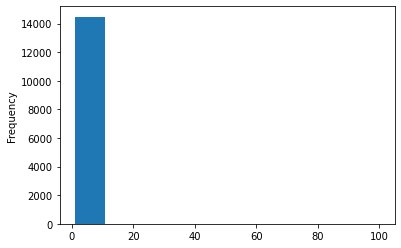

In [7]:
data['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist');

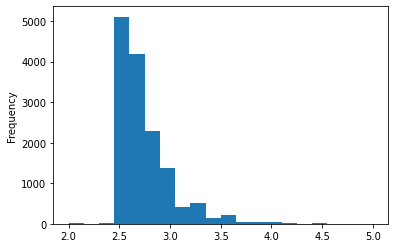

In [8]:
# Чаще всего потолки находятся в диапазоне от 2 до 5 метров, укажем это в параметре range, а также увеличим кол-во корзин
data['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=20, range=(2,5));

Как видно из графиков выше, влияние выбросов на распределение незначительное.
Это также можно проверить методом `describe`.
Также выведем общее кол-во значений в столбце

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Разница между средним и медианой менее 5%.
В приницпе, можно оставить, как есть.
Нужно определить общее кол-во пропусков в данных.

In [10]:
data['ceiling_height'].isna().sum()

9195

Номинальное кол-во получено, но для понимания не очень удобно.
Можно написать небольшую функцию, которая будет возвращать кол-во пропусков в столбце, и сколько это процентов по отношению ко всем строкам.

In [11]:
def nan_calculating(column):
    quantity = data[column].isna().sum()
    ratio = data[column].isna().sum() / len(data)
    return print('Пропущено {}, это составляет {:.1%}'. format(quantity, ratio) + ' значений')

In [12]:
nan_calculating('ceiling_height')

Пропущено 9195, это составляет 38.8% значений


Почти 40% от общего числа строк - пропуски, безусловно, это очень много, нужно что-то с этим делать.

Предположительно, высота потолков может зависеть от этажности дома, в котором находится квартира.
Проверим эту теорию чуть позже, когда проанализируем столбец `floors_total`

#### Проверим данные в стобце `floors_total`

In [13]:
# Сразу проверим кол-во пропусков:
data['floors_total'].isna().sum()

86

Получилось 86, что совсем незначительно для общего кол-ва записей. Можно не исправлять, но тогда мы не сможем изменить тип данных в толбце. Так как значений немного, то можно указать в пустых ячейках.
Пропуски заполняем методом `fillna`
Проверим данные в столбце методом `describe`.
Если всё в порядке, изменим тип данных методом `astype`.

In [14]:
data['floors_total'].describe()
data['floors_total'] = data['floors_total'].fillna(0).astype('int')

##### Взаимосвязь этажности строения и высоты потолков в нём

Для проверки нашей теории попробуем создать сводную таблицу, в которой сгруппируем высоту потолков относительно кол-ва этажей, а также посчитаем медианые значения высоты для каждой группы.

In [15]:
celing_floor_group = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
celing_floor_group.columns = ['median', 'count']
display(celing_floor_group.head())

,median,count
floors_total,,
0,2.8,9
1,2.8,10
2,2.7,215
3,2.8,399
4,3.0,789


Отлично, группировка сработала, медиана посчитана, она не противоречит логике.
На основании проделанной группировки, можно предположить, что уместно заменить пустые значения высоты потолка для каждой группы на медианое значение для этой группы.

In [16]:
# Запустим цикл с loc индексацией и заменяем значения в столюце согласно логическому условию
for floor in celing_floor_group.index:
    data.loc[(
        data['ceiling_height'].isna()) & (data['floors_total'] == floor),
        'ceiling_height'] = celing_floor_group.loc[floor, 'median']
    
# сразу проверяем наличие пустых ячеек
nan_calculating('ceiling_height')

Пропущено 1, это составляет 0.0% значений


In [17]:
# Просто удалим одно оставшееся значение
data.dropna(subset=['ceiling_height'], inplace=True)
nan_calculating('ceiling_height')

Пропущено 0, это составляет 0.0% значений


#### Проверяем данные в столбце `living_area` & `kitchen_area`

Очевидно, что существует корреляция между общей, жилой площадью и площадью кухни.
Поэтому уместно обрабатывать данные по жилой площади и кухни вместе.

In [18]:
data['living_area'].describe()

count    21795.000000
mean        34.457002
std         22.030593
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [19]:
data['kitchen_area'].describe()

count    21420.000000
mean        10.569320
std          5.905146
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [20]:
nan_calculating('living_area')
nan_calculating('kitchen_area')

Пропущено 1903, это составляет 8.0% значений
Пропущено 2278, это составляет 9.6% значений


Можно посчитать средние пропорции, в которых соотносятся общая площадь и жилая или кухни в известных данных.
Используя полученные пропорции, высчитать значения для пустных ячеек.

In [21]:
data['living_area'].fillna(
    (data['living_area'].mean() / data['total_area'].mean()
    ) * data['total_area'], inplace=True)
data['kitchen_area'].fillna(
    (data['kitchen_area'].mean() / data['total_area'].mean()
    ) * data['total_area'], inplace=True)

In [22]:
# проверяем
nan_calculating('living_area')
nan_calculating('kitchen_area')

Пропущено 0, это составляет 0.0% значений
Пропущено 0, это составляет 0.0% значений


#### Проверяем данные в `is_apartment`

In [23]:
data['is_apartment'].describe()

count      2774
unique        2
top       False
freq       2724
Name: is_apartment, dtype: object

In [24]:
# Можно вернуть номера строк, в которых указаны апартаменты
data.index[data['is_apartment'] == True].tolist()

[543,
 916,
 1109,
 1608,
 2759,
 2975,
 3067,
 3816,
 3951,
 4339,
 5076,
 5297,
 5654,
 5809,
 6353,
 6523,
 6561,
 6871,
 7056,
 7206,
 7362,
 7521,
 8018,
 8252,
 8611,
 10390,
 10867,
 11179,
 11492,
 11779,
 12160,
 14459,
 14603,
 15788,
 16166,
 17196,
 18431,
 19017,
 19034,
 19691,
 20008,
 20368,
 20534,
 21244,
 21458,
 22560,
 22869,
 22938,
 22941,
 23236]

Видно, что `True` некторым образом распределено по массиву данных, можно предположить, что во всех остальных строках обычные квартиры и заменить пропуски значением `False`

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

#### Проверяем данные в `balcony`

In [26]:
data['balcony'].describe()

count    12179.000000
mean         1.150177
std          1.071294
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Судя по описанию данных уместно предположить, что пропуски можно смело заменить нулями. А тип данных сменим на целочисленный.

In [27]:
data['balcony'] = data['balcony'].fillna(value=0).astype('int')

#### Обрабатываем данные в `parks_around3000` & `parks_around3000`

In [28]:
# Переводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')
# Переводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')

#### Анализ столбцов с метрическими данными: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`

Причина пропусков в данных нам неизвестна, а сами значения не прдставляется возможным посчитать на основании имеющихся данных, то оставляем пропуски в исходном виде.

#### Обработка столбца `days_exposition`

Так как данные в столбце представляют собой разницу между датой открытия объявления и датой его закрытия, то можно предположить, что неполные данные были связаны с актуальным статусом объявления на момент выгрузки данных. Вместо пропусков можно указать какое-нибудь большое число, несоизмеримое по порядку с имеющимися данными.
Также меняем тип данных на целочисленный.

In [29]:
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int')

In [30]:
# проверяем итог всех наших преобразований
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  int64         
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        23698 non-null  float64       
 6   floors_total          23698 non-null  int64         
 7   living_area           23698 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          23698 non-null  float64       
 13  balcony         

#### Проверяем столбец `locality_name` на наличие явных и неявных дубликатов 

План действий:

    1. Проверяем датасет на наличие явных дубликатов, так как для одного столбца - это норма;
    2. Выводим список уникальных значений и изучаем его;
    3. Приводим всё к нижнему регистру;
    4. Заменяем все "ё" на "е";
    5. Заменяем "городской поселок" на "поселок городского типа";
    6. Проверяем наличие явных дубликатов.

In [31]:
data.duplicated().sum()

0

Явные дубликаты не выявлены.

In [32]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [33]:
data['locality_name'] = data['locality_name'].str.lower()

In [34]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [35]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [36]:
# проверяем результат наших действий
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

#### Вывод о данных после обработки

Мы заполнили пропуски, где это было возможно и уместно, изменили тип данных на корректный, избавились от неявных дубликато в названиях населённых пунктов, теперь данные готовы к дальнейшей работе.

### Посчитайте и добавьте в таблицу новые столбцы

Необходимо подсчитать и добавить в таблицу такие параметры как:
    
   * цену квадратного метра;
   * день недели, месяц и год публикации объявления;
   * этаж квартиры; варианты — первый, последний, другой;
   * соотношение жилой и общей площади, а также отношение площади кухни к общей;
   * пересчитать расстояние до центра в км.



In [37]:
# посчитаем цену квадратного метра, приведем его к типу int
# важно использовать последнюю цену объекта, то есть ту, за которую объект выкупили
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'] = data['square_meter_price'].astype('int')

In [38]:
# создаю столбец дня недели, месяца, года публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [39]:
# создаю функцию категоризации на основании этажа 
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# используя метод apply, применяю категоризацию к каждой строке датафрейма через axis = 1
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'].isna().sum()

0

In [40]:
# добавим столбец соотношения жилой плозади к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']

# добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

### Проведите исследовательский анализ данных

#### Начнём с изучения основных параметров, построим гистограммы распределения и проанализируем их.

In [ ]:
# работаем с площадью: строим гистограмму с подписями осей координат.
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [42]:
# видно длинный шлейф после 125 кв.м., упорядочим объекты по убыванию площади и посмотрим на 10 самых больших
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
print()
print('Количество квартир с площадью более 200 кв.м.:')
print(data.query('total_area > 200.0')['total_area'].count())

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

Количество квартир с площадью более 200 кв.м.:
227


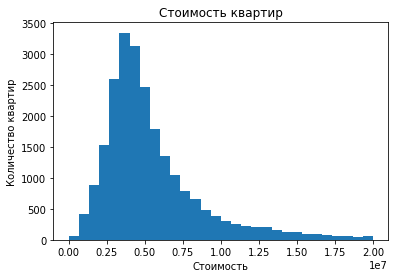

In [43]:
# изучаем стоимость объектов
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [44]:
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))
print()
print('Количество квартир со стоимостью более 10 млн. руб.:')
print(data.query('last_price > 10000000')['last_price'].count())
print()
print('Количество квартир со стоимостью более 20 млн. руб.:')
print(data.query('last_price > 20000000')['last_price'].count())

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64

Количество квартир со стоимостью более 10 млн. руб.:
2721

Количество квартир со стоимостью более 20 млн. руб.:
707


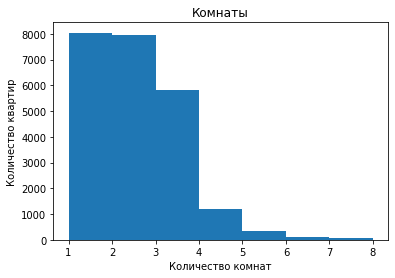

In [45]:
# изучаем количество комнат
plt.hist(data['rooms'], range=(1,8), bins=7)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [46]:
print('Варианты с наибольшим количеством комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))
print()
print('Количество квартир более, чем с 5ю комнатами:')
print(data.query('rooms > 5')['rooms'].count())

Варианты с наибольшим количеством комнат:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64

Количество квартир более, чем с 5ю комнатами:
195


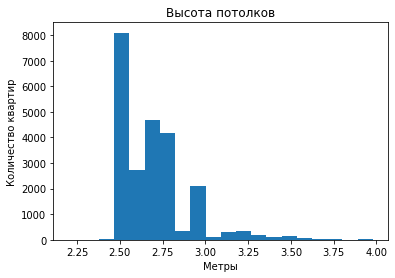

In [47]:
# изучаем высоту потолков, тут важно исключить промышленные объекты, поэтому выполним срез по данным
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

In [48]:
print('Варианты с наиболее высокими потолками:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
print()
print('Количество квартирс потолком более 3м:')
print(data.query('ceiling_height > 3')['ceiling_height'].count())

Варианты с наиболее высокими потолками:
22869    100.0
22336     32.0
3148      32.0
21377     27.5
10773     27.0
17857     27.0
21824     27.0
20478     27.0
5807      27.0
4876      27.0
Name: ceiling_height, dtype: float64

Количество квартирс потолком более 3м:
1530


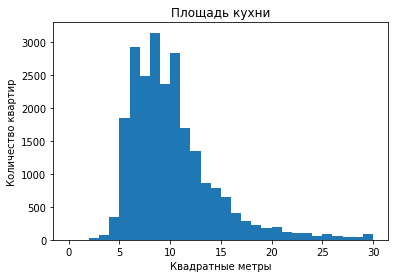

In [49]:
# изучаем площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [50]:
print('Варианты с наибольшей по площади кухней:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
print()
print('Количество квартир с площадью кухни более 15 кв.м.:')
print(data.query('kitchen_area > 15')['kitchen_area'].count())
print()
print('Количество квартир с площадью кухни более 25 кв.м.:')
print(data.query('kitchen_area > 25')['kitchen_area'].count())

Варианты с наибольшей по площади кухней:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.571309
10867     87.200000
9826      86.537967
492       77.000000
Name: kitchen_area, dtype: float64

Количество квартир с площадью кухни более 15 кв.м.:
2666

Количество квартир с площадью кухни более 25 кв.м.:
626


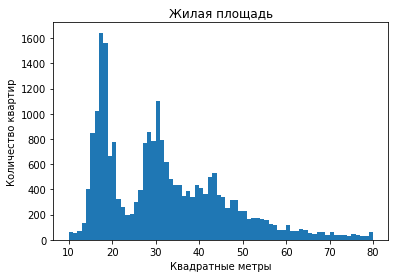

In [51]:
# изучаем жилую площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [52]:
print('Варианты с наибольшей жилой площадью:')
print(data['living_area'].sort_values(ascending=False).head(10))
print()
print('Количество квартир с жилой площадью более 60 кв.м.:')
print(data.query('living_area > 60')['living_area'].count())

Варианты с наибольшей жилой площадью:
19540    409.700000
5358     409.000000
3117     360.289513
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
15016    285.490898
Name: living_area, dtype: float64

Количество квартир с жилой площадью более 60 кв.м.:
1783


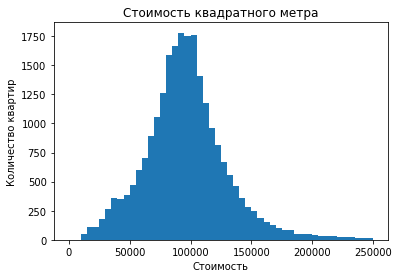

In [53]:
# изучаем цену за квадратный метр
plt.hist(data['square_meter_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [54]:
print('Варианты с наибольшей ценой квадратного метра:')
print(data['square_meter_price'].sort_values(ascending=False).head(10))
print()
print('Количество квартир со стоимостью кв.м. более 200 тыс.руб.:')
print(data.query('square_meter_price > 200000')['square_meter_price'].count())

Варианты с наибольшей ценой квадратного метра:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
17172     848484
4859      848484
16647     841379
17912     813253
Name: square_meter_price, dtype: int64

Количество квартир со стоимостью кв.м. более 200 тыс.руб.:
505


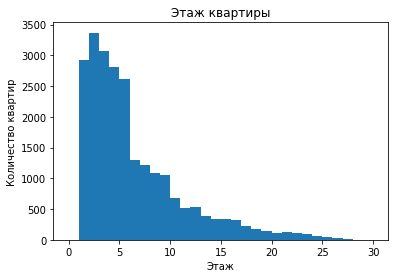

In [55]:
# изучаем этаж квартиры
plt.hist(data['floor'], bins=30, range=(0,30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

In [56]:
print('Варианты на самых высоких этажах:')
print(data['floor'].sort_values(ascending=False).head(10))
print()
print('Количество квартир выше 5 этажа:')
print(data.query('floor > 5')['floor'].count())
print('Количество квартир выше 10 этажа:')
print(data.query('floor > 10')['floor'].count())
print('Количество квартир выше 15 этажа:')
print(data.query('floor > 15')['floor'].count())

Варианты на самых высоких этажах:
18218    33
18629    31
1917     30
11079    29
397      28
7711     27
12888    27
16644    27
13276    27
23292    27
Name: floor, dtype: int64

Количество квартир выше 5 этажа:
8915
Количество квартир выше 10 этажа:
3571
Количество квартир выше 15 этажа:
1463


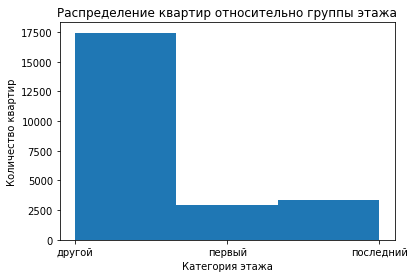

In [97]:
# изучаем тип этажа квартиры
plt.hist(data['floor_category'], bins=3)
plt.title('Распределение квартир относительно группы этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.show()

In [95]:
print('Количество квартир на первом этаже:')
print(data.query('floor_category == "первый"')['floor_category'].count())
print()
print('Количество квартир на последнем этаже:')
print(data.query('floor_category == "последний"')['floor_category'].count())

Количество квартир на первом этаже:
2917

Количество квартир на последнем этаже:
3336


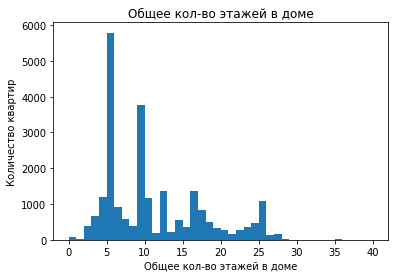

In [99]:
# изучаем общее кол-во этажей в доме
plt.hist(data['floors_total'], bins=40, range=(0, 40))
plt.title('Общее кол-во этажей в доме')
plt.xlabel('Общее кол-во этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

In [96]:
print('Дома с наибольшим количеством этажей:')
print(data['floors_total'].sort_values(ascending=False).head(10))
print()
print('Количество квартир в домах с общим кол-ом этажей более 25:')
print(data.query('floors_total > 25')['floors_total'].count())

Дома с наибольшим количеством этажей:
2253     60
16731    52
16934    37
397      36
5807     36
11079    36
5749     35
9579     35
871      35
14347    35
Name: floors_total, dtype: int64

Количество квартир в домах с общим кол-ом этажей более 25:
341


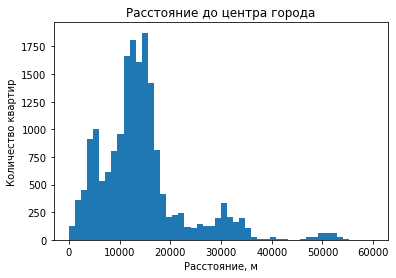

In [61]:
# изучаем расстояние до центра города
plt.hist(data['cityCenters_nearest'], bins=50, range=(0,60000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

In [62]:
print('Наиболее удалённые варианты:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))
print()
print('Кол-во квартир, расположенных далее 35 км.:')
print(data.query('cityCenters_nearest > 35000')['cityCenters_nearest'].count())

Наиболее удалённые варианты:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64

Кол-во квартир, расположенных далее 35 км.:
425


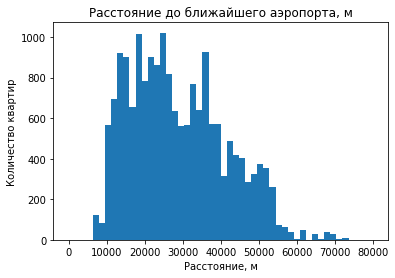

In [63]:
# изучаем расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=50, range=(0,80000))
plt.title('Расстояние до ближайшего аэропорта, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

In [64]:
print('Наиболее удалённые варианты:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))
print()
print('Кол-во квартир, расположенных далее 60 км.:')
print(data.query('airports_nearest > 60000')['airports_nearest'].count())

Наиболее удалённые варианты:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64

Кол-во квартир, расположенных далее 60 км.:
174


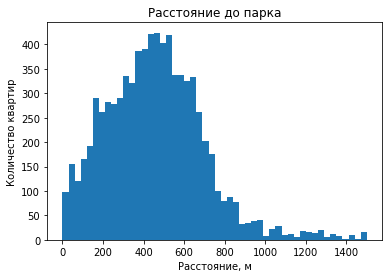

In [65]:
# изучаем расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=50, range=(0,1500))
plt.title('Расстояние до парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

In [66]:
print('Наиболее удалённые варианты:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))
print()
print('Кол-во квартир, расположенных далее 1,2 км.:')
print(data.query('parks_nearest > 1200')['parks_nearest'].count())

Наиболее удалённые варианты:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

Кол-во квартир, расположенных далее 1,2 км.:
273


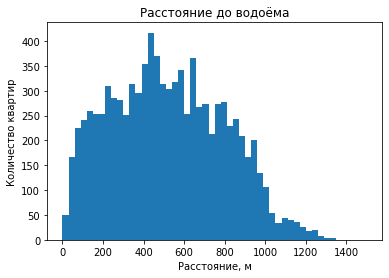

In [67]:
# изучаем расстояние до ближайшего водоёма
plt.hist(data['ponds_nearest'], bins=50, range=(0,1500))
plt.title('Расстояние до водоёма')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

In [68]:
print('Наиболее удалённые варианты:')
print(data['ponds_nearest'].sort_values(ascending=False).head(10))
print()
print('Кол-во квартир, расположенных далее 1,2 км.:')
print(data.query('ponds_nearest > 1200')['ponds_nearest'].count())

Наиболее удалённые варианты:
20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
18396    1299.0
21454    1293.0
20509    1278.0
14927    1278.0
4122     1275.0
Name: ponds_nearest, dtype: float64

Кол-во квартир, расположенных далее 1,2 км.:
52


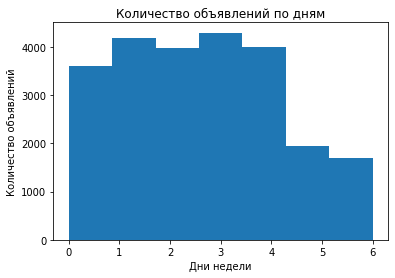

In [106]:
# изучаем день публикации объявления
plt.hist(data['weekday_exposition'], bins=7, range=(0,6))
plt.title('Количество объявлений по дням')
plt.xlabel('Дни недели')
plt.ylabel('Количество объявлений')
plt.show()

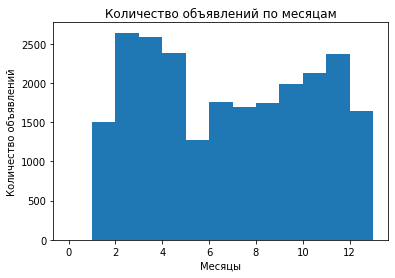

In [115]:
# изучаем месяц публикации объявления
plt.hist(data['month_exposition'], bins=13, range=(0,13))
plt.title('Количество объявлений по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Количество объявлений')
plt.show()

##### Выводы 

**Общая площадь**  
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть 227 объектов с площадью более 200 квадратных метров.

**Площадь кухни**  
Самые распространённые кухни - от 5 до 15 метров. Больше 15 метров встречается 2666 объектов. Больше 25 - единичные случаи (626 штук).

**Жилая площадь**  
Самые распространённые варианты с жилой площадью от 10 до 60 метров. После 60 метров встречается лишь 1783 квартиры. Пики на графиках, вероятно, соотвествуют наиболее частым компановкам 1, 2 и 3 комнатных квартир.

**Стоимость**  
В основном стоимость квартир от 2.5 до 7.5 млн.руб. Больше 10 миллионов встречается 2721 вариантов, а более 20 млн.руб. уже 707.

**Комнаты**  
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 5 комнат вызывают интерес. Можно предположить, что это либо какие-то очень дорогие и большие квартиры, либо объединённые, либо отдельный дом.

**Высота потолков**  
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров потолки могут встречаться только в двух уровневых апартаментах. Есть и выбросы значений, например, 27 метров (высота 9-этажного дома) - скорее всего ошибка данных и реальная высота 2.7 метра.

**Этажность**  
На гистограмме распределения квартир относительно этажа чётко выделяются несколько групп: больше всего квартир располагается до 5 включительно, вторая группа - до 10, третья - примерно до 15. После 15 остаётся только 1463 объекта.
При этом на первый этаж приходится 2917 объектов, последний - 3336. Все остальные квартиры в середине.
Интересно, что большинство объектов расположены в домах высотой до 5 этажей, второе место занимают 9 этажные дома, третье место принадлеж 16 этажным домам. Любопытно, примерно такую же долю занимаюь 25 этажные. Объявлений в более высоких домах всего 341 шт.

**Стоимость квадратного метра**  
Имеет нормальное распределение с пиком в районе 100,000. Вариантов с ценой выше 200 тыс.руб. всего 505 штук, можно считать эти случаи единичными.

**Расстояния до центра, аэропорта, парка, водоёма**  
В основном объекты находятся на расстоянии от 10 до 20 км до центра города, распределение Пуассона, от 10 до 40 км до аэропорта, и не более 1 км до парка или водоёма.

**Расписание публикаций**  
Судя по графикам основная часть объявлений публикуется по будням с понедельника по пятницу. Вероятно, это связано с деятельностью риеторских агенств. К сожалению, мы не обладаем информацией об авторстве.  
По месяцам получается, что больше всего объявлений появляется с февраля по май. Май-июнь сильная просадка, с сентября по ноябрь идёт рост предложения.

#### Изучаем срок реализации объектов недвижимости

Важными для анализа метриками будут являться максимальное, минимальное, среднее и медианое значения.

In [69]:
# не забываем исключить срезом значения == 9999, используем метод describe
data.query('days_exposition != 9999')['days_exposition'].describe()

count    20517.000000
mean       180.894868
std        219.731529
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Таким образом, среднее значение равно 181 день, а медиана - 95 дней.

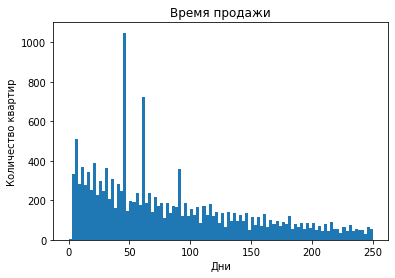

In [70]:
# гистограма времени продажи, так как 75% = 232, то есть смысл ограничить range 250 значениями 
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

##### Вывод

В основном объекты продаются около 100 дней. При этом быстрой продажей можно назвать срок до 45 дней, а медленной - более 230 дней.  
Безусловно, есть варианты, проданные в первые дни после публикации объявления, так и те, что зависали на десятки месяцев.

#### Обработка выбросов

На основании предыдущего анализа стало понятно, что во всех интересующих нас столбцах имеются выбросы.  
Можно избавиться от них, если отбросить все значения данных, лежащие за пределами размаха "усов", рассчитываемого на основании межквартильного диапазона, также называемого IQR.

In [71]:
# функция для подсчёта границ с учетом 1.5 размаха IQR
def quartile_range(column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    qr = data.loc[(data[column] < q3 + 1.5 * iqr) & (data[column] > q1 - 1.5 * iqr), column]
    return qr

In [72]:
# столбцы с выбросами
columns_list = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in columns_list:
    data[col] = quartile_range(col)

In [73]:
# возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype('int')

In [74]:
# проверяем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
count,23698.000000,2.163700e+04,22458.000000,23698.000000,22223.000000,23698.000000,22810.000000,23698.000000,22373.000000,23698.000000,...,8079.000000,23698.000000,9109.000000,20117.000000,2.369800e+04,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000
mean,9.858511,4.839736e+06,54.362830,2.013503,2.665983,10.634146,31.532599,5.891257,9.422158,0.591105,...,490.804555,0.590809,518.028982,162.579808,9.942127e+04,2.569289,6.400203,2017.367204,0.565266,0.186180
std,5.682646,2.217125e+06,19.383259,0.986846,0.147498,6.614941,13.761100,4.882407,3.181717,0.959311,...,342.317995,0.883879,277.697965,177.727292,5.030787e+04,1.789118,3.491600,1.039755,0.101065,0.069467
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,0.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,44.000000,7.658450e+04,1.000000,3.000000,2017.000000,0.500000,0.136856
50%,9.000000,4.400000e+06,50.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,502.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.570982,0.175143
75%,14.000000,6.000000e+06,65.600000,3.000000,2.750000,16.000000,40.610000,8.000000,11.000000,1.000000,...,612.000000,1.000000,729.000000,217.000000,1.142575e+05,4.000000,10.000000,2018.000000,0.631579,0.223718
max,50.000000,1.189440e+07,114.600000,5.000000,3.050000,60.000000,76.700000,33.000000,19.450000,5.000000,...,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


##### Вывод

Мы отбросили все выбросы для интересующих нас столбцов в дата-фрейме, что сделало оставшиеся данные чище и более адекватными.

#### Определение параметров, влияющих на стоимость квартиры. Корреляция.

Можно было бы применить марицу рассеивания для всех столбцов, а также метод corr, но из-за большого количества параметров такие выгрузки теряют свою наглядность.  
Поэтому было прнято решение попарного сравненя параметров.

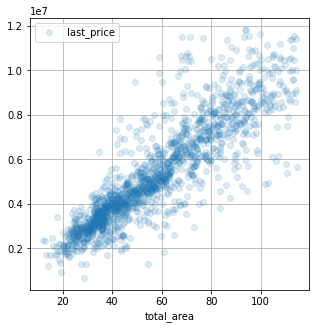

Корреляция цены объекта и общей площади: 

            last_price  total_area
last_price    1.000000    0.886709
total_area    0.886709    1.000000 



In [75]:
# проверяем зависимость цены объекта от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.15)
)
plt.show()
print('Корреляция цены объекта и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

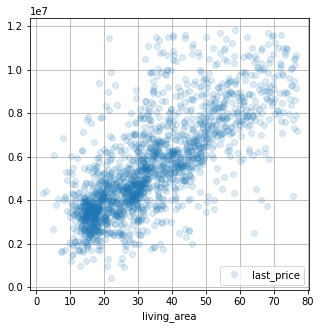

Корреляция цены объекта и жилой площади: 

             last_price  living_area
last_price     1.000000     0.633251
living_area    0.633251     1.000000 



In [76]:
# проверяем зависимость цены объекта от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.15)
)
plt.show()
print('Корреляция цены объекта и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

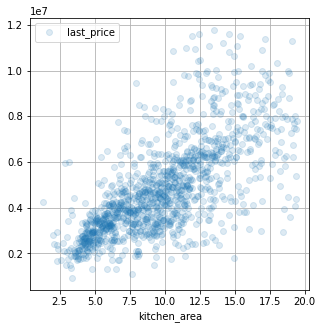

Корреляция цены объекта и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.445499
last_price        0.445499    1.000000 



In [77]:
# проверяем зависимость цены объекта от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.15)
)
plt.show()
print('Корреляция цены объекта и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

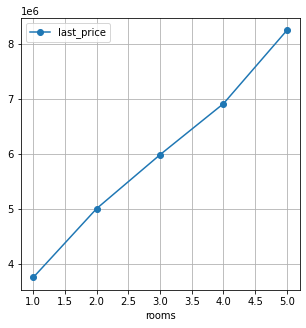

Корреляция цены и общего числа комнат: 

            last_price     rooms
last_price    1.000000  0.381946
rooms         0.381946  1.000000 



In [78]:
# проверяем зависимость цены объекта от общего числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общего числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

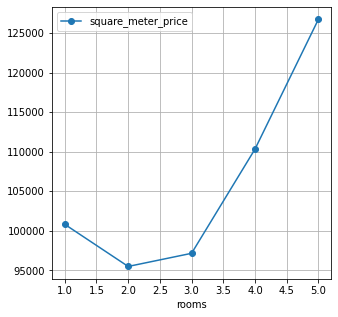

Корреляция цены за квадрат и числа комнат: 

                       rooms  square_meter_price
rooms               1.000000           -0.213924
square_meter_price -0.213924            1.000000 



In [79]:
# Зависимость цены за квадрат от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='square_meter_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'square_meter_price']).corr(),'\n')

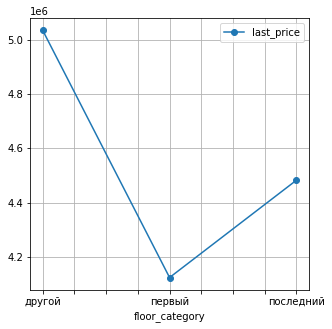

Корреляция цены и этажа: 

            last_price
last_price         1.0 



In [80]:
# проверяем зависимость цены объекта от этажа
(
    data.pivot_table(index='floor_category', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и этажа:','\n')
print(data.pivot_table(index='floor', values=['floor_category', 'last_price']).corr(),'\n')

Странно, что коррекляция не посчиталась. Вероятно, это связано с тем, что это попытка построить корреляцию между категориальными и численными значениями.

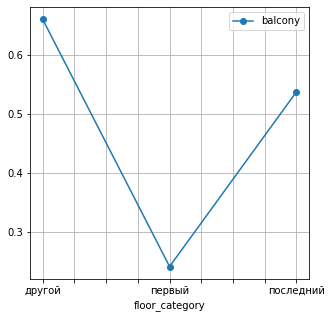

Корреляция этажа и количества балконов: 

         balcony
balcony      1.0 



In [81]:
# проверяем зависимость этажности объекта и наличия балкона
(
    data.pivot_table(index='floor_category', values='balcony')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция этажа и количества балконов:','\n')
print(data.pivot_table(index='floor', values=['floor_category', 'balcony']).corr(),'\n')

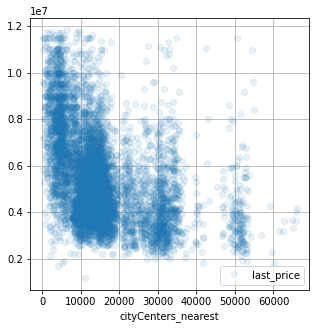

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.668376
last_price                      0.668376    1.000000 



In [82]:
# проверяем зависимость цены объекта от удалённости от центра
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.1)
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

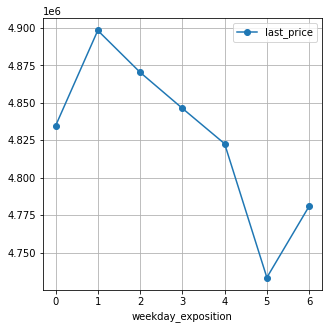

Корреляция цены и дня размещения объявления: 

                    last_price  weekday_exposition
last_price            1.000000            0.710813
weekday_exposition    0.710813            1.000000 



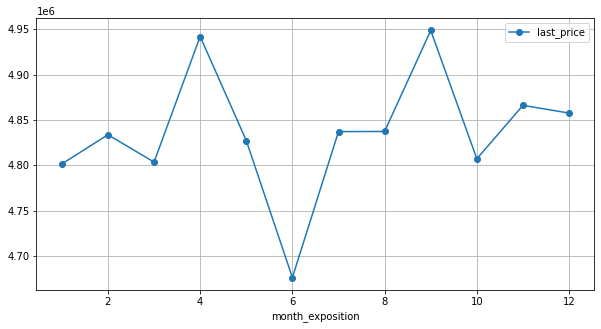

Корреляция цены и дня размещения объявления: 

                  last_price  month_exposition
last_price          1.000000          0.186385
month_exposition    0.186385          1.000000 



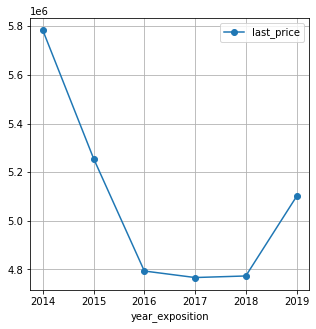

Корреляция цены и дня размещения объявления: 

                 last_price  year_exposition
last_price         1.000000         0.489239
year_exposition    0.489239         1.000000 



In [83]:
# проверяем зависимость цены объекта от дня, месяца, года размещения объявления
# день недели
(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и дня размещения объявления:','\n')
print(data.pivot_table(index='floor', values=['weekday_exposition', 'last_price']).corr(),'\n')

# месяц
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()
print('Корреляция цены и дня размещения объявления:','\n')
print(data.pivot_table(index='floor', values=['month_exposition', 'last_price']).corr(),'\n')

# год
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и дня размещения объявления:','\n')
print(data.pivot_table(index='floor', values=['year_exposition', 'last_price']).corr(),'\n')

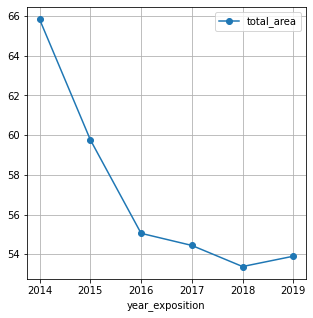

In [117]:
# проверка динамики площади объекта по годам
(
    data.pivot_table(index='year_exposition', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

##### Выводы

**Цена и общая площадь, площадь кухни, жилая площадь**  
Корреляция между общей площадью, площадью кухни, жилой площадью и ценой за объект присуствует. Чем больше общая площадь, тем выше цена на объект. При этом самая высокое значение корреляции между ценой и общей площадью, а самое маленькое с размером кухни.

**Цена и количество комнат**  
Корреляция между количеством комнат и ценой также присуствует, но не такая высокая, как ожидалось. Поэтому были проведены дополнительные расчёты: определялась корреляция между стоимость. квадратного метра и количеством комнат. Выяснилось, что имеет место отрицательная корреляция. Самая высокая стоимость кв.м. у 4х и 5и-комнатных квартир, а самая маленькая - у двухкомнатных. Возможно, это связано с элитарностью подобных объектов.
При этом стоимость квадратного метра у 1-комнатных квартир выше, чем у 3-комнатных. Скорее всего, это связано с тем, что 1-комнатные квартиры часто покупаются, как бизнес-проекты, что делает их оборот более простым.
Самая низкая цена кв.м. у 2-комнатных квартир.

**Цена и этажность**  
Согласно графику взаимосвязи этажности и цены, становится понятно, что самые дешёвые квартиры находятся на первом этаже. Не последнюю роль в этом играет отсутствие балконов на первых этажах, что подтверждается графиком зависимости этажности и количества балконов. При этом квартиры на последнем этаже немного дороже, ну а самые дорогие варианты - все остальные.

**Цена и расстояние до центра города**  
Как и ожидалось, имеется прямая корреляция между расстоянием до центра города и ценой на объект. Однако даже недалеко от центра имеются доступные варианты. В целом, интересно, что именно для объектов недалеко от центра имеется самый большой по цене.

**Цена и время публикации объявления**  
По времени размещения объявления видно, что наиболее дорогие квартиры размещаются в понедельник, а дешёвые в субботу. По месяцам: дорогие в апреле и сентябре, а дешевле объекты в июне. А вот с годами ситуация интереснее: наблюдается резкое снижение стоимости в 2016-2018 годах. Дополнительное исследование изменения общей площади по годам показало, что в это же время наблюдалось резкое уменьшение площади продаваемых объектов. Таким образом, снижение стоимости - последствие снижения общей площади.

#### Сравнение средней стоимости квадратного метра в топ-10 городов

In [86]:
# считаем частоту упоминаний каждого населённого пункта и упорядочиваем по убыванию
city_pop_ten = data['locality_name'].value_counts().head(10)
# делаем срез данных по самый упоминаемым городам, 
# затем считаем средний размер стоимости кв. м. группировкой в сводной таблице по названию городов
city_smp = data.query('locality_name in (@city_pop_ten.index)').pivot_table(values='square_meter_price', index='locality_name', aggfunc='median')
# меняем на целочисленный тип с округлением
city_smp = city_smp.astype('int')

# выводим на экран в порядке убывания
city_smp.sort_values('square_meter_price', ascending=False)

,square_meter_price
locality_name,
санкт-петербург,104765
пушкин,100000
деревня кудрово,91860
поселок парголово,91642
поселок мурино,85878
поселок шушары,76876
колпино,74723
гатчина,67796
всеволожск,65789


##### Выводы

Как и ожидалось, самая высокая стоимость кв.м. в Санкт-Петербурге, следомидёт Пушкин, вероятно, это связано с развитой инфраструктурой и соверменной застройкой. Далее в списке идут районы, примыкающие к городу, де факто воспринимаемые его частью. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, расположенных отдалённо до Санкт-Петербурга, топ по доступности - Выборг небольшой городок на большом удалении от Санкт-Петербурга.

#### Определение средней стоимости километра, при оценивании удалённости квартиры от центра Санкт-Петербурга

In [87]:
# расстояние до центра в км, с переводом в целочисленный тип и округлением
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype('int')
display(data['cityCenters_nearest_km'].head(10))

0    16
1    18
2    13
3     6
4     8
5     0
6    19
7    11
8     0
9    15
Name: cityCenters_nearest_km, dtype: int64

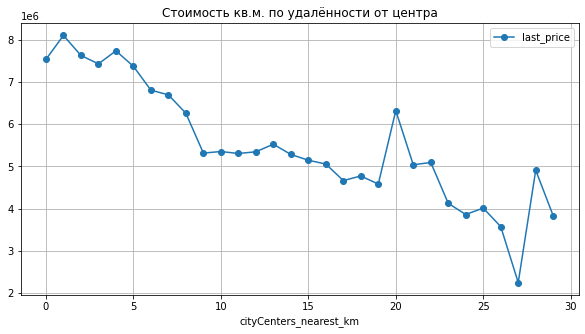

In [88]:
# срезом выбираем Санкт-Петербург, строим график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), title = 'Стоимость кв.м. по удалённости от центра')
)
plt.show()

In [89]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc='mean')

,square_meter_price
cityCenters_nearest_km,
0,174401.571429
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


##### Выводы

Чётко видна стоимость каждого километра, выраженная в средней стоимости кв.м. Можно сказать, чточем ближе к центру, тем дороже обходится приближение на каждый километр.

### Общий вывод

**Факторы, оказывающие наибольшее влияние на стоимость объекта**  
    
    * общая площадь: количество комнат не столь важно, хотя наиболее выгодным вариантом являются 2х комнатные квартиры;
    * жилая площадь и расстояние до центра Санкт-Петербурга обладают схожими коэффициентами корреляции;
    * этаж: первый этаж значительно дешевле, однако квартир на первом этаже меньше всего в выборке.


**Срок реализации**  
    
    * Медианое значение равно 95 дней, если меньше 45 - считается быстро, дольше 130 - долго;
    * Есть большое число квартир, проданных всего за несколько дней после публикации;
    * Также есть объекты, которые продавались несколько десятков месяцев;
    * В 2016 году резко уменьшилась общая площадь квартир в следствии чего уменьшились и цены, в 2019 цены вновь начали расти.

**Сравнение стоимости квадратного метра в 10 самых упоминаемых городах**  

    * Самый дорогой - Санкт-Петербург 114849;
    * Самый доступный - Выборг 58141.

**Стоимость приближения к центру**  
Очевидно, что самая высокая стоимость кв.м. в центре города, самая низкая - наиболее удалённая.
Хотелось бы отметить, что чётко виден скачок в стоимости средней стоимости кв.м. между 7 и 8 километрами, вероятно, здесь проходит граница исторического центра города.

**Проделанная работа**  
Мы обработали полученный архив данных и на его основании выполнили:

* обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы;
* посчитали и добавили в таблицу цену квадратного метра, выделили из даты дни недели, месяцы и года размещения объявлений, добавили категории в зависимости от этажности;
* изучили влияние следующих параметров на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах (выбросы);
* изучая время продажи квартир мы пришли к выводу, что нормальные значения продажи квартир варьируются от 45 до 250 дней;
* выявили топ 10 городов по частоте упоминаний в объявлениях, оценили стоимость квадратного метра в каждом;
* обнаружили, что в 2016-2018 годах была сильная просадка стоимости квартир;
* исследовали изенение стоимости кв. м. относительно удаления от центра Санкт-Петербурга.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод